In [1]:
# machine learning module
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

# DNN module
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.utils.vis_utils import plot_model

# Loss
from sklearn.metrics import mean_squared_error        # regression 문제의 모델 성능 측정을 위해서 MSE를 불러온다.

import matplotlib.pyplot as plt

In [2]:
# Load datset
bos = load_boston()

df = pd.DataFrame(bos.data)       # bos.data: 데이터 불러오기
df.columns = bos.feature_names    # bos.feature_names: 컬럼명 불러오기
df['Price'] = bos.target          # bos.target: 타겟값 불러오기

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [3]:
# Data Processing

df_values = df.values
X = df_values[:,1:].astype(float) 
Y = df_values[:,0]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [4]:

X_train[:,1] = X_train[:,1] / X_train[:,1].max()
X_train[:,2] = X_train[:,2] / X_train[:,2].max()
X_train[:,3] = X_train[:,3] / X_train[:,3].max()
X_train[:,4] = X_train[:,4] / X_train[:,4].max()
X_train[:,5] = X_train[:,5] / X_train[:,5].max()
X_train[:,6] = X_train[:,6] / X_train[:,6].max()
X_train[:,7] = X_train[:,7] / X_train[:,7].max()

X_test[:,1] = X_test[:,1] / X_test[:,1].max()
X_test[:,2] = X_test[:,2] / X_test[:,2].max()
X_test[:,3] = X_test[:,3] / X_test[:,3].max()
X_test[:,4] = X_test[:,4] / X_test[:,4].max()
X_test[:,5] = X_test[:,5] / X_test[:,5].max()
X_test[:,6] = X_test[:,6] / X_test[:,6].max()
X_test[:,7] = X_test[:,7] / X_test[:,7].max()

In [5]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], kernel_initializer='glorot_uniform', activation='relu'))
model.add(Dense(32, kernel_initializer='glorot_uniform', activation='relu'))
model.add(Dense(32, kernel_initializer='glorot_uniform', activation='relu'))
model.add(Dense(16, kernel_initializer='glorot_uniform', activation='relu'))  
model.add(Dense(8, kernel_initializer='glorot_uniform', activation='relu'))  
model.add(Dense(1, kernel_initializer='glorot_uniform'))
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

In [6]:
history = model.fit(X_train, Y_train, batch_size=32, epochs=500, verbose=0, validation_split=.2)

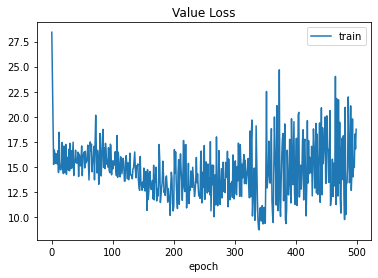

In [7]:
plt.plot(history.history['val_loss'])
plt.title('Value Loss')
plt.ylabel('')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [8]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


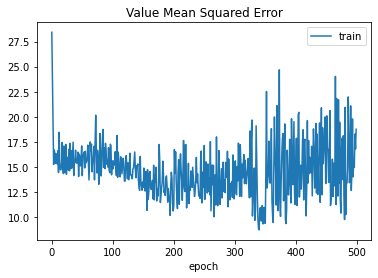

In [9]:
plt.plot(history.history['val_mse'])
plt.title('Value Mean Squared Error')
plt.ylabel('')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

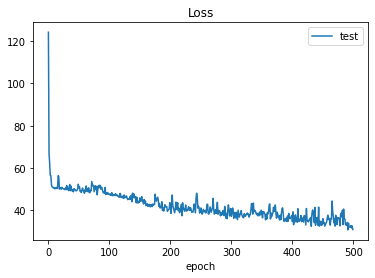

In [10]:
plt.plot(history.history['loss'])
plt.title('Loss')
plt.ylabel('')
plt.xlabel('epoch')
plt.legend(['test'], loc='upper right')
plt.show()

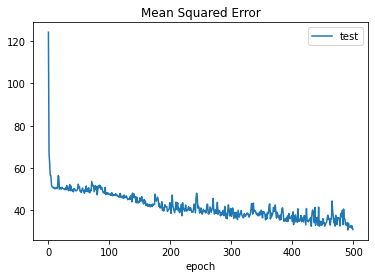

In [11]:
plt.plot(history.history['mse'])
plt.title('Mean Squared Error')
plt.ylabel('')
plt.xlabel('epoch')
plt.legend(['test'], loc='upper right')
plt.show()

In [12]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

pred_crimes = model.predict(X_test)
mse_pred_score = metrics.mean_squared_error(pred_crimes, Y_test)
print('mse_pred_score {}'.format(mse_pred_score))
rmse_pred_score = np.sqrt(mse_pred_score)
print('rmse_pred_score {}'.format(rmse_pred_score))
r2_pred_score = r2_score(Y_test, pred_crimes, multioutput='uniform_average')  
print('r2_pred_score - Coefficient of Determination {}'.format(r2_pred_score))

5/5 [==============================] - 0s 3ms/step
mse_pred_score 46.75688646866192
rmse_pred_score 6.837900735508078
r2_pred_score - Coefficient of Determination 0.45025447664287865


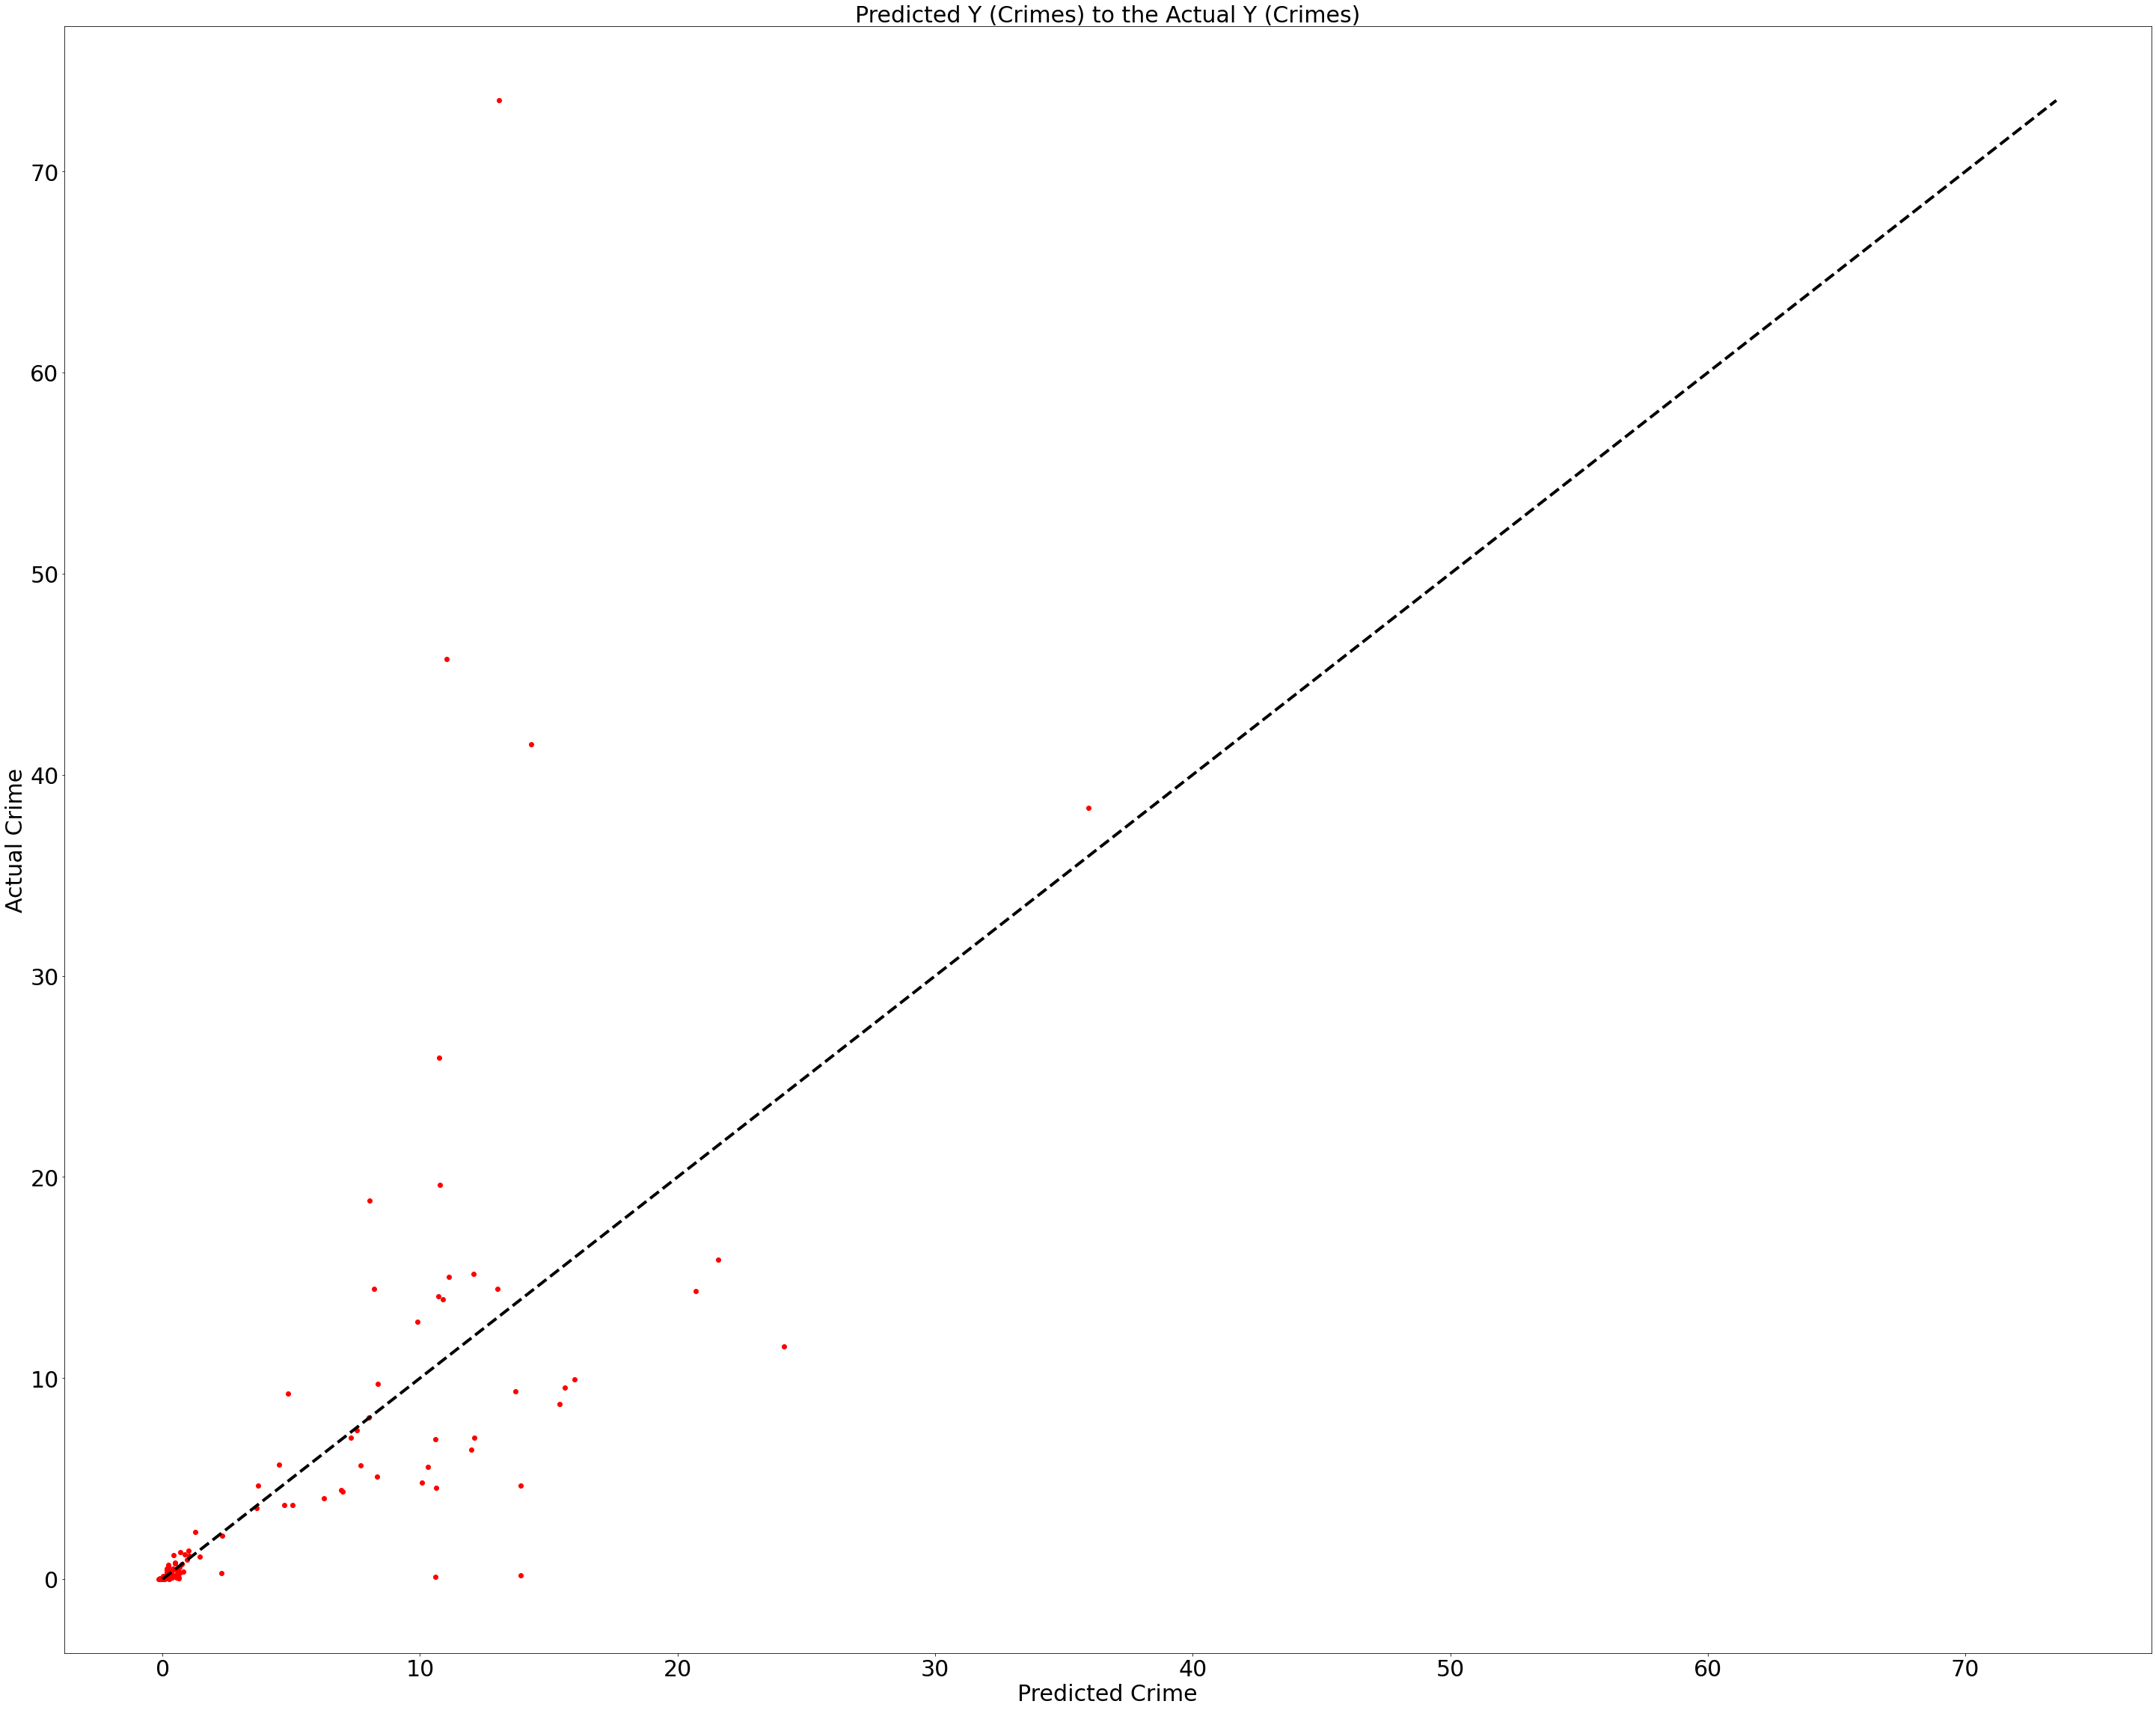

In [13]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30) 
fig, ax = plt.subplots(figsize=(50, 40))
plt.style.use('ggplot')
plt.plot(pred_crimes, Y_test, 'ro')
plt.xlabel('Predicted Crime', fontsize = 30)
plt.ylabel('Actual Crime', fontsize = 30)
plt.title('Predicted Y (Crimes) to the Actual Y (Crimes)', fontsize = 30)
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=4)
plt.show()

In [14]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 10.9 MB/s eta 0:00:00


In [15]:
import shap

In [16]:
explainer = shap.DeepExplainer(model, X_train)

keras is no longer supported, please use tf.keras instead.
Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.


In [17]:
shap_values = explainer.shap_values(X_test)

`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


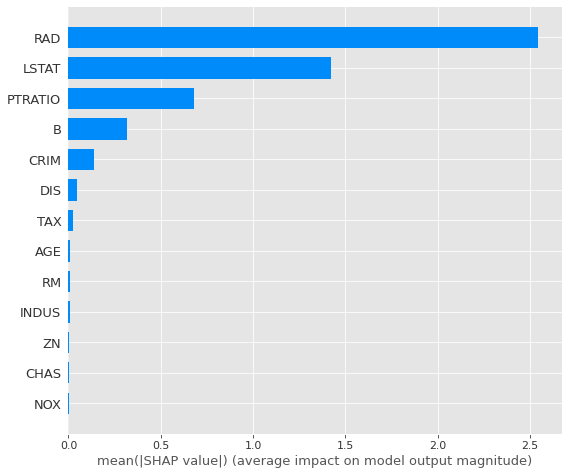

In [19]:
shap.summary_plot(shap_values[0], plot_type = 'bar', feature_names = df.iloc[:, :-1].columns)

In [20]:
shap.initjs()
shap.force_plot(explainer.expected_value[0].numpy(), shap_values[0][0], features = df.iloc[:, :-1].columns)

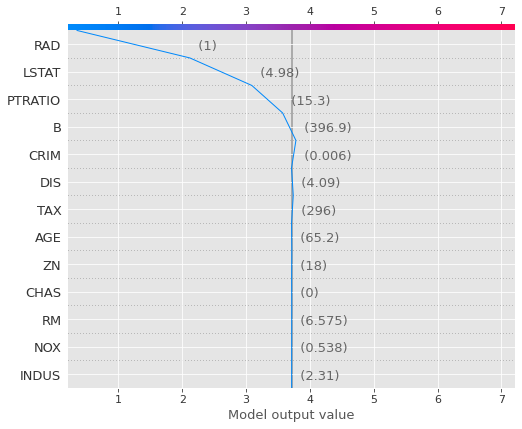

In [22]:
shap.decision_plot(explainer.expected_value[0].numpy(), shap_values[0][0], features = df.iloc[:, :-1], feature_names = df.iloc[:, :-1].columns.tolist())

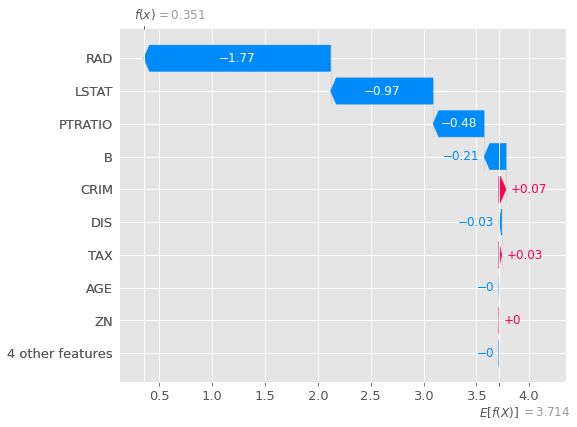

In [24]:
shap.plots._waterfall.waterfall_legacy(explainer.expected_value[0].numpy(), shap_values[0][0], feature_names = df.iloc[:, :-1].columns)

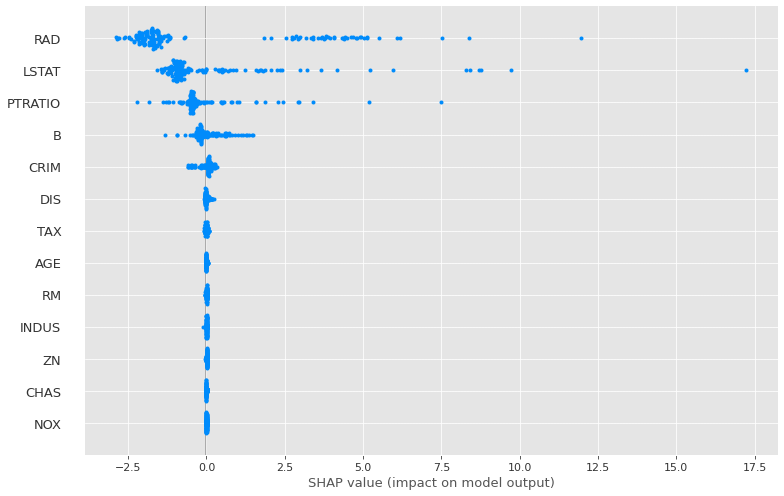

In [29]:
shap.summary_plot(shap_values[0], feature_names=df.iloc[:, :-1].columns, plot_size = (11,7))